In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic') 
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline


import warnings 
warnings.simplefilter("ignore")

---
## 결측치 채우기

In [2]:
df = pd.read_csv("./datasets/2022년데이터/코스닥_22년재무.csv", encoding="cp949")
df_ww = pd.read_csv("./datasets/2022년데이터/2022WW지수.csv", index_col=0) 
df_ww = df_ww[["회사명", "거래소코드", "회계년도", "WW지수"]]
df.isna().sum()

회사명                                          0
거래소코드                                        0
회계년도                                         0
자산(*)(요약)(IFRS)(백만원)                         4
이익잉여금(결손금)(요약)(IFRS)(백만원)                    4
자산(*)(요약)(IFRS연결)(백만원)                     305
이익잉여금(결손금)(요약)(IFRS연결)(백만원)                305
순운전자본비율(IFRS)                                9
순운전자본비율(IFRS연결)                            307
부채(*)(요약)(IFRS)(백만원)                         4
부채(*)(요약)(IFRS연결)(백만원)                     305
금융비용부담률(IFRS)                                9
금융비용부담률(IFRS연결)                            307
영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS)(백만원)        4
당기순이익(손실)(요약)(IFRS)(백만원)                     4
매출액(수익)(요약)(IFRS)(백만원)                       4
영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)    305
당기순이익(손실)(요약)(IFRS연결)(백만원)                 305
매출액(수익)(요약)(IFRS연결)(백만원)                   305
dtype: int64

In [3]:
df_1 = df.copy()
df_2 = df.copy()

In [4]:
# #  연결 재무제표를 개별제무제표로 대체


connected_cols = [col for col in df.columns if "연결" in col]

for connected_col in connected_cols:
    original_col = connected_col.replace("연결", "")
    if original_col in df.columns:
        df.loc[df[connected_col].isnull(), connected_col] = df[original_col]

In [5]:
df.isna().sum()

회사명                                        0
거래소코드                                      0
회계년도                                       0
자산(*)(요약)(IFRS)(백만원)                       4
이익잉여금(결손금)(요약)(IFRS)(백만원)                  4
자산(*)(요약)(IFRS연결)(백만원)                     0
이익잉여금(결손금)(요약)(IFRS연결)(백만원)                0
순운전자본비율(IFRS)                              9
순운전자본비율(IFRS연결)                            5
부채(*)(요약)(IFRS)(백만원)                       4
부채(*)(요약)(IFRS연결)(백만원)                     0
금융비용부담률(IFRS)                              9
금융비용부담률(IFRS연결)                            5
영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS)(백만원)      4
당기순이익(손실)(요약)(IFRS)(백만원)                   4
매출액(수익)(요약)(IFRS)(백만원)                     4
영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)    0
당기순이익(손실)(요약)(IFRS연결)(백만원)                 0
매출액(수익)(요약)(IFRS연결)(백만원)                   0
dtype: int64

In [6]:
for i in range(df_1.shape[0]):
    if pd.isnull(df_1.loc[i,'자산(*)(요약)(IFRS연결)(백만원)']):
       df_1.loc[i,'자산(*)(요약)(IFRS연결)(백만원)'] = df_1.loc[i,'자산(*)(요약)(IFRS)(백만원)']

df_1[["자산(*)(요약)(IFRS연결)(백만원)","자산(*)(요약)(IFRS)(백만원)"]].isna().sum()

자산(*)(요약)(IFRS연결)(백만원)    0
자산(*)(요약)(IFRS)(백만원)      4
dtype: int64

In [7]:
df_2["자산(*)(요약)(IFRS연결)(백만원)"].fillna(df_2["자산(*)(요약)(IFRS)(백만원)"],inplace=True)

df_2[["자산(*)(요약)(IFRS연결)(백만원)","자산(*)(요약)(IFRS)(백만원)"]].isna().sum()


자산(*)(요약)(IFRS연결)(백만원)    0
자산(*)(요약)(IFRS)(백만원)      4
dtype: int64

---
## 데이터 전처리

In [8]:
df.shape

(1503, 19)

In [9]:
## 거래소코드 패딩
def padding(x):
    x = str(x)
    return x.rjust(6, "0")
## 외국계기업 제거
def func_isnt_fcompany(x):
    if x[:1] == '9':
        return False
    else:
        return True

# 회계년도컬럼, 년도만 뽑아서 int화
def change_year(x):
    return int(x[:4])

def func_not(x):
    return not x

def change_year_2(x):
    return (x[:4])


## 거래소 코드 패딩
df['거래소코드'] = df['거래소코드'].map(padding)
# 회계년도 제거
df['회계년도'] = df['회계년도'].map(change_year)



In [10]:
## 중복되는 데이터 제거
df.drop_duplicates(['거래소코드',"회계년도"], keep='last', inplace=True)
df.reset_index(drop=True, inplace=True)

print(df.shape)
## 없음


(1503, 19)


In [11]:
## 외국계 기업 제거
print("제거할 데이터 수 : ", len(df[df["거래소코드"].map(func_isnt_fcompany).map(func_not)]))
print('제거할 외국계 기업 수',len(df[~df["거래소코드"].map(func_isnt_fcompany)].회사명.unique()))

df = df[df["거래소코드"].map(func_isnt_fcompany)]
print('남은 데이터 수',df.shape[0]) # 외국계기업 데이터 24개 제거
print('남은 기업 수',len(df['회사명'].unique()))
print(df.shape)

제거할 데이터 수 :  11
제거할 외국계 기업 수 11
남은 데이터 수 1492
남은 기업 수 1491
(1492, 19)


In [12]:
## 회사수와 거래소코드수 차이가나는것 확인
print("회사수 : ", len(df["회사명"].unique()))
print("거래소코드수 : ", len(df["거래소코드"].unique()))

회사수 :  1491
거래소코드수 :  1492


In [13]:
## 거래소 코드 중복기업 전처리
list_overlap_code = list()
for i in list(df["회사명"].unique()):
    if len(df[df["회사명"]==i]["거래소코드"].unique()) > 1:
        list_overlap_code.append(i)
print("거래소코드가 2개인 기업 수", len(list_overlap_code), "개")

거래소코드가 2개인 기업 수 1 개


In [14]:
list_overlap_code

['에스케이오션플랜트(주)']

In [15]:
# 중복 거래소코드 제거
def func_overlap_code(x):
    if x == (df[df["회사명"]==company_name]["거래소코드"].iloc[-1]) :
        return True
    else:
        return False

list_companyname = list(df["회사명"].unique())


dfs = list()


for i in list_companyname:
    company_name = i
    #각 기업별로 데이터프레임 생성
    df_concat = df[df["회사명"]==i]
    df_concat = df_concat[df_concat["거래소코드"].map(func_overlap_code)] # 거래소코드 바뀌기 전의 거래소코드의 데이터는 삭제
    dfs.append(df_concat)
df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)

In [16]:
# 회사명이 2개인 거래소코드 존재 확인 
list_overlap_code = list()
for i in list(df["거래소코드"].unique()):
    if len(df[df["거래소코드"]==i]["회사명"].unique()) > 1:
        list_overlap_code.append(i)
list_overlap_code

[]

In [17]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '자산(*)(요약)(IFRS)(백만원)',
       '이익잉여금(결손금)(요약)(IFRS)(백만원)', '자산(*)(요약)(IFRS연결)(백만원)',
       '이익잉여금(결손금)(요약)(IFRS연결)(백만원)', '순운전자본비율(IFRS)', '순운전자본비율(IFRS연결)',
       '부채(*)(요약)(IFRS)(백만원)', '부채(*)(요약)(IFRS연결)(백만원)', '금융비용부담률(IFRS)',
       '금융비용부담률(IFRS연결)', '영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS)(백만원)',
       '당기순이익(손실)(요약)(IFRS)(백만원)', '매출액(수익)(요약)(IFRS)(백만원)',
       '영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)', '당기순이익(손실)(요약)(IFRS연결)(백만원)',
       '매출액(수익)(요약)(IFRS연결)(백만원)'],
      dtype='object')

In [18]:
df = df[['회사명', '거래소코드', '회계년도','자산(*)(요약)(IFRS연결)(백만원)', '이익잉여금(결손금)(요약)(IFRS연결)(백만원)','순운전자본비율(IFRS연결)','부채(*)(요약)(IFRS연결)(백만원)','금융비용부담률(IFRS연결)',
    '영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)', '당기순이익(손실)(요약)(IFRS연결)(백만원)', '매출액(수익)(요약)(IFRS연결)(백만원)']]

---
## 데이터 합치기

In [19]:
# # 거래소 코드 패딩
df_ww['거래소코드'] = df_ww['거래소코드'].map(padding)

In [20]:
df = df.merge(df_ww, on=["회사명", "거래소코드","회계년도"], how="left")
df.shape

(1491, 12)

In [21]:
시총_df = pd.read_csv("./datasets/2022년데이터/2022시총.csv", index_col=0)
시총_df['거래소코드'] = 시총_df['거래소코드'].map(padding)
시총_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1615 entries, 0 to 1614
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   거래소코드   1615 non-null   object 
 1   시가총액    1615 non-null   float64
dtypes: float64(1), object(1)
memory usage: 37.9+ KB


In [22]:
df = df.merge(시총_df, on=["거래소코드"], how="left")
df.shape

(1491, 13)

In [23]:
df.dropna(axis=0, inplace=True)

---
## 컬럼 만들기

In [24]:
## 누적수익성비율  - 자산0이면 inf - 공시안함 
df['누적수익성비율'] = df['이익잉여금(결손금)(요약)(IFRS연결)(백만원)']/df['자산(*)(요약)(IFRS연결)(백만원)']

## TMD
df['TMD'] = df['부채(*)(요약)(IFRS연결)(백만원)'] / df['시가총액']

# abs(영업현금흐름-당기순이익)/매출액
df["abs(영업현금흐름-당기순이익)/매출액"] = np.abs((df["영업활동으로 인한 현금흐름(간접법)(*)(요약)(IFRS연결)(백만원)"] - df["당기순이익(손실)(요약)(IFRS연결)(백만원)"])) / df["매출액(수익)(요약)(IFRS연결)(백만원)"]

In [25]:
df = df[["회사명", "거래소코드", "회계년도", "누적수익성비율", "TMD", "abs(영업현금흐름-당기순이익)/매출액", "순운전자본비율(IFRS연결)", "금융비용부담률(IFRS연결)",'WW지수']]

---
## 22년 예측하기

In [26]:
rename_list = {'순운전자본비율(IFRS연결)': '순운전자본비율', '금융비용부담률(IFRS연결)': '금융비용부담률'}
df.rename(columns=rename_list,inplace=True)

In [27]:
과거_df = pd.read_csv("./datasets/전처리준비/코스닥결측치처리완료_000.csv", index_col=0)
과거_df = 과거_df[["회사명", "거래소코드", "회계년도", "누적수익성비율", "TMD", "abs(영업현금흐름-당기순이익)/매출액", "순운전자본비율", "금융비용부담률",'WW지수', "target_3"]]
df = pd.concat([과거_df, df], axis=0)
df.fillna(0,inplace=True)

In [28]:
y = pd.read_csv("./datasets/y/y값최종내용_1.csv", index_col=0)
y['거래소코드'] = y['거래소코드'].map(padding)

In [29]:

df['거래소코드'] = df['거래소코드'].map(padding)

In [30]:
df.isna().sum()

회사명                      0
거래소코드                    0
회계년도                     0
누적수익성비율                  0
TMD                      0
abs(영업현금흐름-당기순이익)/매출액    0
순운전자본비율                  0
금융비용부담률                  0
WW지수                     0
target_3                 0
dtype: int64

In [ ]:
# LR

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

df["Z"] = (df["abs(영업현금흐름-당기순이익)/매출액"]*2.516516) + (df["금융비용부담률"]*0.077222) + (df["WW지수"]*0.179561)+(df["누적수익성비율"]*-1.360175) + (df["TMD"]*0.647083) + (df["순운전자본비율"]*-0.016068)+ 4.10454281

df["proba"] = sigmoid(df["Z"]) *100
df["proba"].describe()

In [32]:
df_12 = df[df["회계년도"] == 2012].reset_index(drop=True)
df_13 = df[df["회계년도"] == 2013].reset_index(drop=True)
df_14 = df[df["회계년도"] == 2014].reset_index(drop=True)
df_15 = df[df["회계년도"] == 2015].reset_index(drop=True)
df_16 = df[df["회계년도"] == 2016].reset_index(drop=True)
df_17 = df[df["회계년도"] == 2017].reset_index(drop=True)
df_18 = df[df["회계년도"] == 2018].reset_index(drop=True)
df_19 = df[df["회계년도"] == 2019].reset_index(drop=True)
df_20 = df[df["회계년도"] == 2020].reset_index(drop=True)
df_21 = df[df["회계년도"] == 2021].reset_index(drop=True)
df_22 = df[df["회계년도"] == 2022].reset_index(drop=True)

In [33]:
df_ls = [df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22]

임계_ls = []
for i in df_ls:
    정상기업점수평균 = np.mean(i[i["target_3"]==0]["proba"])
    부실기업점수평균 = np.mean(i[i["target_3"]==1]["proba"])

    정상기업수 = len(i[i["target_3"]==0].index)
    부실기업수 = len(i[i["target_3"]==1].index)

    임계점 = ((부실기업수 * 정상기업점수평균) + (정상기업수 * 부실기업점수평균)) / (정상기업수 + 부실기업수)
    임계_ls.append(임계점)



임계_df =pd.DataFrame({"임계_ls":임계_ls}, index=["2012", "2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"])
임계_df


,임계_ls
2012,55.483155
2013,47.049584
2014,60.026730
2015,49.655280
2016,48.118167
2017,37.916240
2018,49.971648
2019,67.996760
2020,66.249464
2021,76.984759


임계_ls    100.0
Name: 2012, dtype: float64 임계_ls    105.25879
dtype: float64 임계_ls    74.512558
dtype: float64 임계_ls    51.937893
dtype: float64 임계_ls    65.058651
dtype: float64 임계_ls    80.719228
dtype: float64 임계_ls    82.916197
dtype: float64 임계_ls    96.941942
dtype: float64 임계_ls    88.959947
dtype: float64 임계_ls    110.561477
dtype: float64


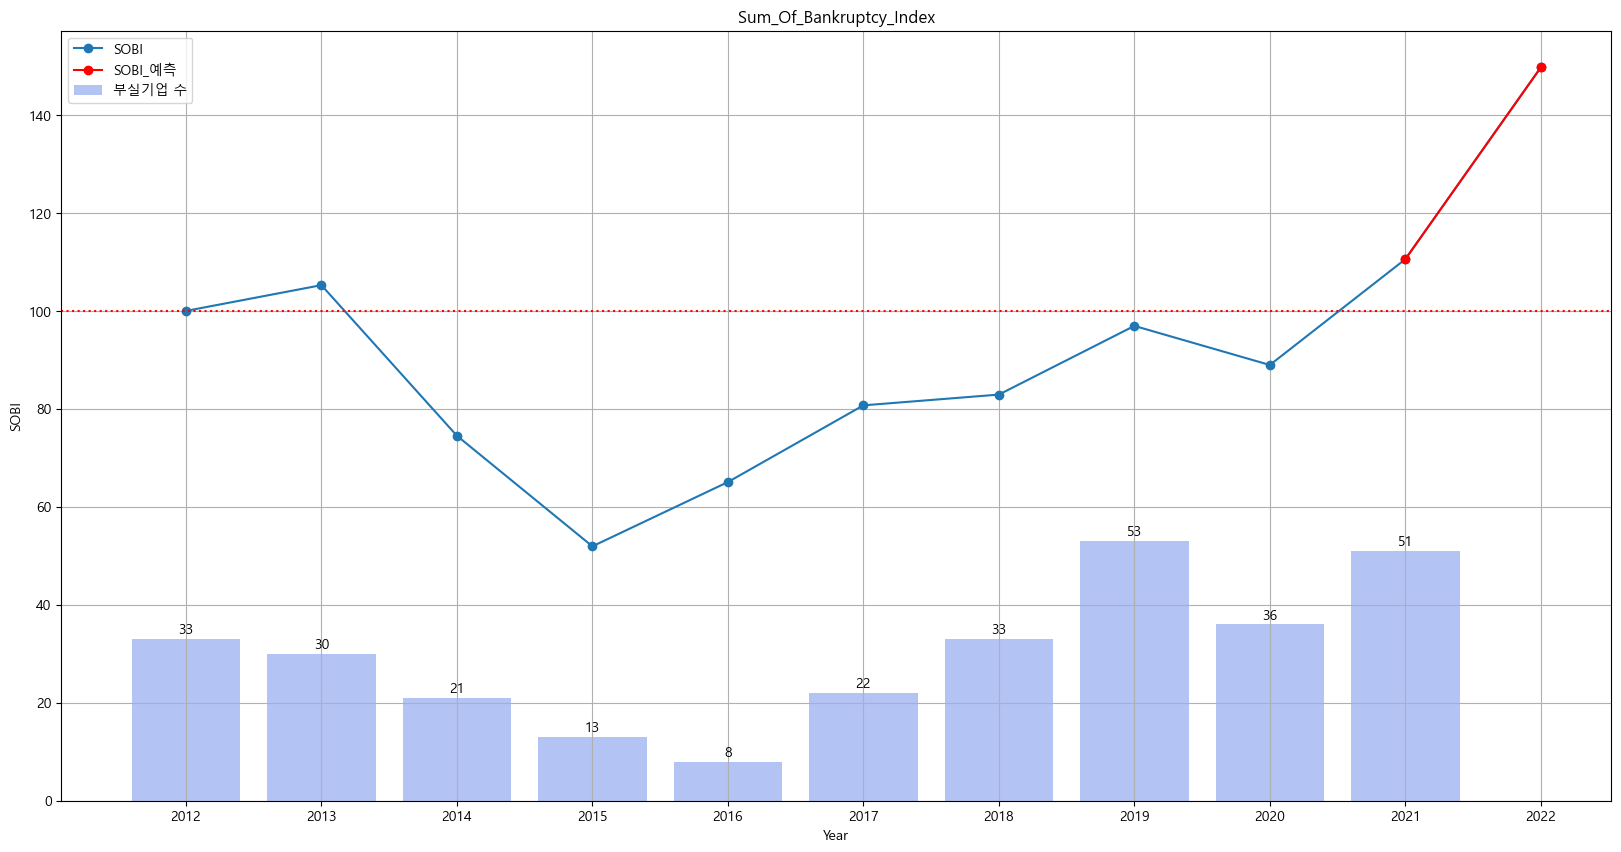

In [34]:
## 회계년도 다음3월말 BBB회사채3년금리
# 임계_df.loc['2011','임계_ls'] = 8.31
임계_df = pd.DataFrame()

임계_df.loc['2012','임계_ls'] = 7.13
임계_df.loc['2013','임계_ls'] = 7.74
임계_df.loc['2014','임계_ls'] = 6.51
임계_df.loc['2015','임계_ls'] = 6.56
임계_df.loc['2016','임계_ls'] = 6.95
임계_df.loc['2017','임계_ls'] = 7.43
임계_df.loc['2018','임계_ls'] = 6.70
임계_df.loc['2019','임계_ls'] = 6.25
임계_df.loc['2020','임계_ls'] = 6.22
임계_df.loc['2021','임계_ls'] = 7.84
임계_df.loc['2022','임계_ls'] = 9.10

# # 각 연도의 데이터 수 계산
n_12 = len(df_12)
n_13 = len(df_13)
n_14 = len(df_14)
n_15 = len(df_15)
n_16 = len(df_16)
n_17 = len(df_17)
n_18 = len(df_18)
n_19 = len(df_19)
n_20 = len(df_20)
n_21 = len(df_21)
n_22 = len(df_22)

# 해당 년도 전체 기업 프로바 합계

sum_12proba =  df_12["proba"].sum() * 임계_df.iloc[0] 
sum_13proba =  df_13["proba"].sum() * 임계_df.iloc[1]
sum_14proba =  df_14["proba"].sum() * 임계_df.iloc[2] 
sum_15proba =  df_15["proba"].sum() * 임계_df.iloc[3] 
sum_16proba =  df_16["proba"].sum() * 임계_df.iloc[4] 
sum_17proba =  df_17["proba"].sum() * 임계_df.iloc[5] 
sum_18proba =  df_18["proba"].sum() * 임계_df.iloc[6] 
sum_19proba =  df_19["proba"].sum() * 임계_df.iloc[7] 
sum_20proba =  df_20["proba"].sum() * 임계_df.iloc[8] 
sum_21proba =  df_21["proba"].sum() * 임계_df.iloc[9] 
sum_22proba =  df_22["proba"].sum() * 임계_df.iloc[10] 


index_12 = ((sum_12proba/n_12)/(sum_12proba/n_12))*100
index_13 = ((sum_13proba/n_13)/(sum_12proba/n_12))*100
index_14 = ((sum_14proba/n_14)/(sum_12proba/n_12))*100
index_15 = ((sum_15proba/n_15)/(sum_12proba/n_12))*100
index_16 = ((sum_16proba/n_16)/(sum_12proba/n_12))*100
index_17 = ((sum_17proba/n_17)/(sum_12proba/n_12))*100
index_18 = ((sum_18proba/n_18)/(sum_12proba/n_12))*100
index_19 = ((sum_19proba/n_19)/(sum_12proba/n_12))*100
index_20 = ((sum_20proba/n_20)/(sum_12proba/n_12))*100
index_21 = ((sum_21proba/n_21)/(sum_12proba/n_12))*100
index_22 = ((sum_22proba/n_21)/(sum_12proba/n_12))*100


print(index_12, index_13,index_14,index_15,index_16,index_17,index_18,index_19,index_20,index_21)

# x축, y축 데이터 설정
years = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,2022]
kosdap_bankruptcy_index_of_sum = [index_12,index_13,index_14,index_15,index_16,index_17,index_18,index_19,index_20,index_21,index_22]

df_ls = [df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21,df_22]

# ls = []
# for i in df_ls:
#     타겟수 = len(np.unique(i[i["target_3"]==1]["회사명"]))
#     ls.append(타겟수)

ls= [  33, 30, 21, 13, 8, 22,  33,  53, 36, 51]
타겟수_df =pd.DataFrame({"ls":ls}, index=["2012", "2013","2014","2015","2016","2017","2018","2019","2020","2021"])
# 타겟수_df



# 그래프 생성

plt.figure(figsize=(20, 10))
plt.plot(years, kosdap_bankruptcy_index_of_sum, marker='o',label = "SOBI")
plt.plot([2021,2022], [index_21,index_22], color= "#FF0000",marker='o',label = "SOBI_예측")
# plt.plot(years,임계_df["임계_ls"],marker='x',label = "임계")
plt.xlabel('Year')
plt.bar(
타겟수_df.index.astype("int"), 타겟수_df["ls"], color = "royalblue",alpha = 0.4,label='부실기업 수')
plt.ylabel('SOBI')
plt.title('Sum_Of_Bankruptcy_Index')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(2012,2023,1))
plt.axhline(100, linestyle = ":", color = "r")

# # 각 지점의 값을 그래프에 표시

for i, v in enumerate(타겟수_df["ls"]):
    plt.text(years[i], v+0.5, str(v), ha='center', va='bottom', fontsize=10)

plt.show()


